In [2]:
% matplotlib inline

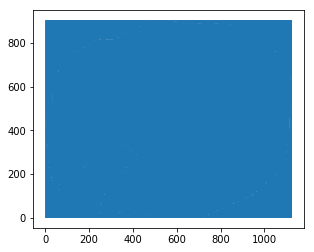

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pprint import pprint
import os

from skimage import measure
from skimage import filters
import geopandas as gpd
from raster_to_polygon_to_geojson import raster2geojson

def binarize(img):
    return cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 5, 10)


def map_segment(map_src):
    img = cv2.imread(map_src, 0)
    binary_img = 255 - binarize(img)
    plt.figure('original')
    plt.imshow(binary_img, cmap='gray')
    kernel = np.ones((5,5), np.uint8)
    dilated = cv2.dilate(binary_img, kernel, iterations = 1)
    #pprint(dilated)
    dilated = dilated / 255
    #img_after = zhangSuen(dilated)
    #img_after = bwmorph_thin(dilated)
    dilated_src = os.path.join(os.path.dirname(map_src), 'dilated.tiff')
    cv2.imwrite(dilated_src, dilated)
    #os.system("/home/dlbox/Documents/func_region/Code/voronoi/build/src/voronoi thin/home/dlbox/Documents/func_region/Code/voronoi/build/src" + " zhang_suen_fast " + dilated_src)
    img_after = cv2.imread(dilated_src, 0)

    plt.figure('dilated')
    plt.imshow(dilated, cmap='gray')    

    plt.figure('processed')
    plt.imshow(img_after, cmap='gray')
    plt.show()

def ccl(map_src, connectivity=None):
    img = cv2.imread(map_src, 0)
    blobs =  binarize(img)

    kernel = np.ones((10,10), np.float32) / 25
    smoothed = cv2.filter2D(blobs, -1, kernel)
    plt.figure('smoothed')
    plt.imshow(smoothed)
    blobs = blobs / 255
    #all_labels = measure.label(blobs, connectivity=2)
    blobs_labels = measure.label(blobs, neighbors=8,connectivity=1, background=0)

    """
    plt.figure(figsize=(9, 3.5), facecolor='None')
    plt.subplot(131)
    plt.imshow(blobs, cmap='gray')
    plt.axis('off')
    plt.subplot(132)
    plt.imshow(all_labels, cmap='spectral')
    plt.axis('off')
    plt.subplot(133)
    """
    plt.figure('ccl')
    plt.imshow(blobs_labels, cmap='spectral')
    plt.axis('off')
    plt.show()

    #cv2.imwrite(os.path.join(os.path.dirname(map_src), 'labeled_map.tiff'), blobs_labels, cmap='spectral')

def geopd(src):
    roadnet = gpd.read_file(src)
    roadnet.plot();
    
def main():
    img_src = '../Data/Temp/raster_map.tiff'
    img_src_2 = '/home/dlbox/Documents/func_region/Data/Temp/map_segmented.png'
    gjson_src = '../Data/Temp/polygon.json'
    ## segment regions using roadnetwork
    #map_segment(img_src)

    ## connect component labeling
    #ccl(img_src_2)

    #raster2geojson(img_src_2)
    geopd('/home/dlbox/Documents/func_region/Out/Map/QGIS/map_segmented.shp') 

if __name__ == '__main__':
    main()